In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain = [0, 1]

x0 = [0.1, 0.5, 0.9]
a0 = [1.5, 0.8, -1.0]

μ0 = DiscreteMeasure(x0, a0)

DiscreteMeasure([0.1, 0.5, 0.9], [1.5, 0.8, -1.0], 1, 3)

In [17]:
# Define noise level
noise_level = 0.05

# Seed for noise
# Random.seed!(22)

0.05

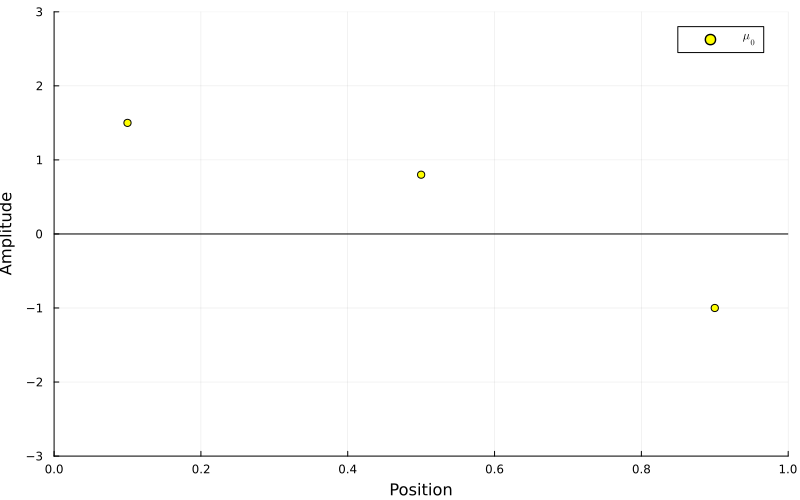

In [18]:
# Define the plot
num_points = 1000
plt_grid = range(domain..., length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = plot(xlims=extrema(domain), ylims=(-3, 3), xlabel="Position", ylabel="Amplitude", legend=:topright, size=plot_size)
hline!(plt, [0], linestyle=:solid, color=:black, label="")

plot_spikes!(plt, μ0, label=L"μ_0", color=:yellow)

In [19]:
ops = gaussian_operators_1D(.05, plt_grid)

Operators(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.001:1.0, var"#gauss1DN#28"{var"#gauss1D#27"}(var"#gauss1D#27"())), var"#Φ#31"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}}(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.001:1.0, var"#gauss1DN#28"{var"#gauss1D#27"}(var"#gauss1D#27"()))), var"#adjΦ#32"{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#adjΦ#26#33"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}}}(0.0:0.001:1.0, var"#adjΦ#26#33"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base

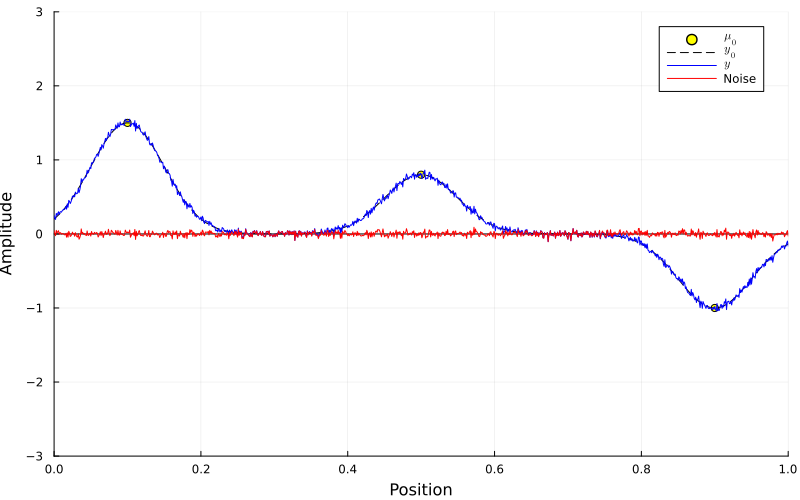

In [20]:
# Calculate the observation y0 = Φμ0
y0 = ops.Φ(x0, a0)

# Add noise to the observation y = y0 + w
sigma = noise_level * norm(y0)
w = randn(length(y0))
w = w / norm(w) * sigma
y = y0 + w

plt_obs = deepcopy(plt)

plot!(plt_obs, plt_grid, y0, label=L"y_0", color=:black, linestyle=:dash)
plot!(plt_obs, plt_grid, y, label=L"y", color=:blue)
plot!(plt_obs, plt_grid, w, label="Noise", color=:red)


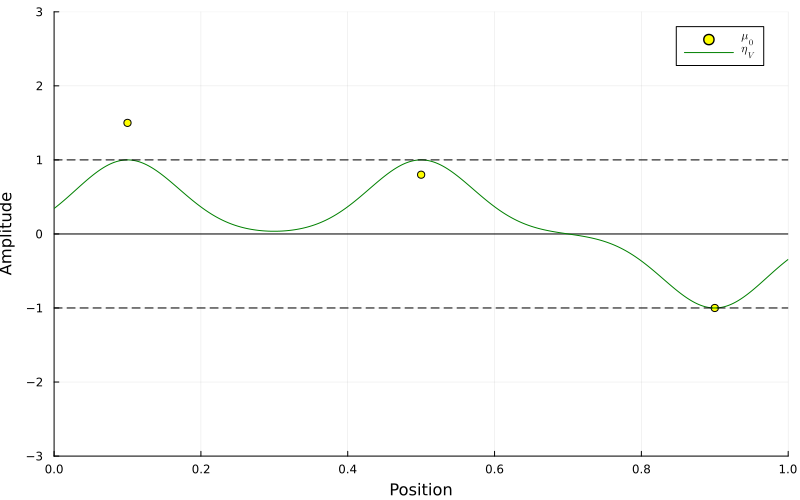

In [21]:
ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

plot!(plt_cert, plt_grid, ηV, label=L"η_V", color=:green)
hline!(plt_cert, [1, -1], linestyle=:dash, color=:black, label="")

## Sliding Frank-Wolfe

In [22]:
# Define λ the regularisation parameter
λ = 1

prob_sfw = BLASSO(y, ops, domain, λ)

solve!(prob_sfw, :SFW)

BLASSO{Float64}([0.24868467856698606, 0.21484605158559528, 0.1960474419700104, 0.2770434695925478, 0.2526370491033106, 0.27594772440611437, 0.29982409544591726, 0.26234651789304975, 0.29402192929114584, 0.3013257321783087  …  -0.1641173151366485, -0.18300263087447163, -0.15689725047034866, -0.16667510988407702, -0.20234954676309533, -0.16681326523642517, -0.16504376887863925, -0.12308972655641354, -0.0961147531862939, -0.1630160628972595], Operators(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.001:1.0, var"#gauss1DN#28"{var"#gauss1D#27"}(var"#gauss1D#27"())), var"#Φ#31"{var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}}(var"#ϕ#29"{Float64, StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, var"#gauss1DN#28"{var"#gauss1D#27"}}(0.05, 0.0:0.00

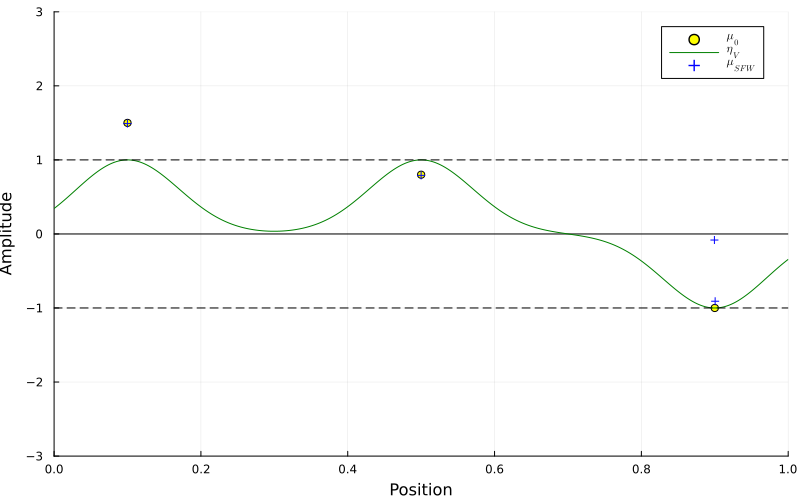

In [23]:
plt_sfw = deepcopy(plt_cert)

plot_spikes!(plt_sfw, prob_sfw.μ, label=L"μ_{SFW}", color=:blue, marker=:cross)
